# Куличенко Владимир БПМ172

Рассмотрим начально-краевую задачу для одномерного уравнения теплопроводности:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}
$$


c краевыми условиями $(t \geqslant 0)$

$$
u(0, t) = u(1, t) = 0
$$

и начальным условием $(0 < x < 1)$

$$
u(x, 0) = \sin{\pi x} \;.
$$

Требуется написать программу, строящую решение в области $0 \leqslant x \leqslant 1$ и $t \geqslant 0$ с использованием конечно-разностной неявной схемы на четырехточечном шаблоне.

Решение визуализировать, сравнить с точным решением.

Рассчитать порядок точности схемы и сравнить с порядком аппроксимации.

## Решение

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [89]:
h = 0.1
tau = 0.0001

### Находим сетку решений методом прогонки

In [90]:
def find_u(tau,h):    
    x = np.arange(0, 1 + h, h)
    t = np.arange(0, 1 + tau, tau)
    x_grid, t_grid = np.meshgrid(x, t) 
    
    u_true = np.exp(-t_grid * np.pi**2) * (np.sin(np.pi * x_grid)) 
    
    sigma = tau/h**2

    A = -sigma
    C = -sigma
    B = 1+2*sigma
    
    size_tau = len(t)
    size_h = len(x)
    
    u = np.zeros((size_h, size_tau))
    p = np.zeros(size_h)
    q = np.zeros(size_h)
    
    # начальные и граничные условия
    u[:,0] = np.sin(np.pi * x)
    u[0,:] = 0
    u[-1,:] = 0
    
    for j in range(1,size_tau):
        for i in range(2,size_h-1):
            p[i] = (-C)/(A*p[i-1] + B)
            q[i] = (u[i-1][j-1] - A*q[i-1])/(A*p[i-1] + B)
        u[-1][j] = (u[-1][j-1] - A*q[-1])/(A*q[-1] + B)
        
        for i in range(size_h-2,0,-1):
            u[i][j] = (u[i][j-1] - A*q[i] - C*u[i+1][j]) / (A*p[i] + B)
            
    return u.T, u_true

In [91]:
u, u_true = find_u(tau,h)

### Визуализация решений

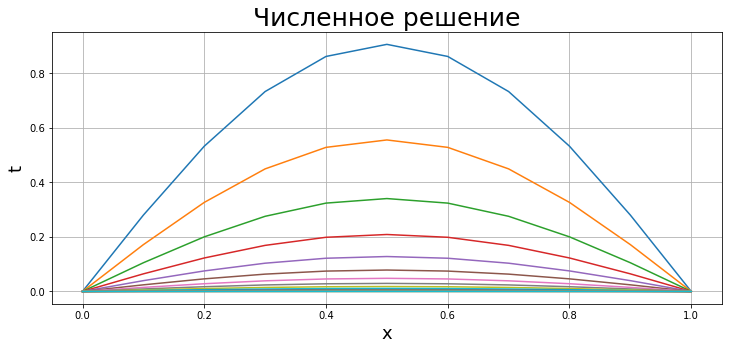

In [92]:
plt.figure(figsize=(12,5)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Численное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u[int(t/tau),:])

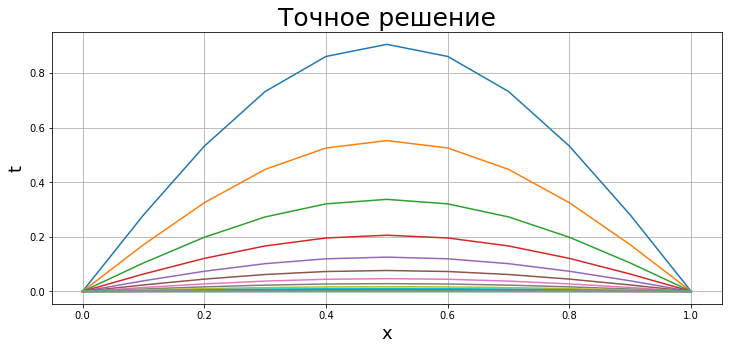

In [93]:
plt.figure(figsize=(12,5)) 
plt.xlabel('x', fontsize=18)
plt.ylabel('t', fontsize=18)
plt.title('Точное решение', fontsize=25)
plt.grid(True)
x_scale = np.arange(0,x_max+h,h) 
plot_times = np.arange(0.01,1.0,0.05)
for t in plot_times:
       
       plt.plot(x_scale,u_true[int(t/tau),:])

Как видим, решения практически совпали.

### Найдем ошибку

In [118]:
def err(h, tau):
    u, u_true = find_u(tau,h)
    err_list = []
    
    #считаем ошибку на каждом слое
    for i in range(u.shape[1]):
        err_list.append(sum(abs(np.array(u_true[:,i]) - np.array(u[:,i]))))
    
    #находим средне значение на каждом элементе
    error = sum(err_list)/(u.shape[0] * u.shape[1])
    
    return error

#### $h$ фиксированно. Меням $\tau$

In [121]:
h = 0.1
tau = 0.08

print(err(h, tau ))
print(err(h, tau/2 ))
print(err(h, tau/4 ))

0.01823117347856609
0.010763611323560143
0.005908612171941424


#### Как видим, ошибка убывает пропорционально изменению $\tau$

#### Теперь фиксируем $\tau$, h изменяем

In [127]:
h = 0.2
tau = 0.0001

print(err(h ,tau))
print(err(h/2 ,tau))
print(err(h/4 ,tau))

0.0017684186397034266
0.0005090297074144439
0.0001563526061304142


#### Как видим, ошибка уменьшалась пропорционально $h^2$

### Это соответсвует порядку аппроксимации $O(\tau + h^2)$, который мы получили на семинаре